In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Code')

from utility_functions import *
from weight_matrix import *
from parameters import *
from sim_network_EI import sim_network_Perturb
from scipy.special import lambertw, exp1, expi, hyp2f1, gamma, gammaincc
from scipy import optimize, integrate
import mpmath as mp
from natsort import natsorted
from glob import glob
from phi import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:
# def sim_network_EI_perturb(parameters, W, t_start_perturb1, t_start_perturb2, t_end_perturb1, t_end_perturb2, perturb_amp):

#     # Unpackage Parameters
#     dt = parameters.dt
#     gain = parameters.gain
#     N = parameters.N
#     NE = parameters.NE
#     NI = parameters.NI
#     Etr = parameters.Etr
#     trans = parameters.trans
#     power = parameters.power
#     thres = parameters.Vthres
#     Nt = parameters.Nt
#     simPhi = parameters.simPhi
#     VReset = parameters.Vreset

#     # Simulation variables
#     t = 0
#     numSpikes = 0
#     maxSpikes = parameters.maxSpikes  # 500 Hz / neuron
#     spkTimes = np.zeros((int(maxSpikes), 2))  # store spike times and neuron labels
#     memVol = np.zeros((Nt, N))
#     gSyn = np.zeros((Nt, N))
#     spkTrain = np.zeros((Nt, N))

#     # Initialization
#     V = np.random.uniform(0, 2, size=(N,))
#     noise = np.concatenate( (np.ones((NE, )) * parameters.IeE, np.ones((NI, )) * parameters.IeI) )
#     spks = np.zeros((N, ))
#     tauMem = np.concatenate(
#         (1 / parameters.tauE * np.ones(int(NE), ), 1 / parameters.tauI * np.ones(int(NI), )),
#         axis=0)
#     memVol[0,:] = V.copy()
#     spkTrain[0,:] = spks.copy()
#     gSyn[0,:] = noise.copy()

#     count = 0

#     for i in range(0, Nt - 1, 1):

#         t += dt

#         if (t >= t_start_perturb1) and (t < t_end_perturb1):
#             E = noise + perturb_amp
#         elif (t >= t_start_perturb2) and (t < t_end_perturb2):
#             E = noise - perturb_amp
#         else:
#             E = noise
            
#         V += tauMem * ( dt * (-V + E) + np.dot(W, spks) ) - V * spks

#         # Refractory Period
#         # for j in range(N):
#         #     if (lastAP[j] + Etr / dt) >= (i + 1):
#         #         memVol[i + 1, j] = 0

#         # Decide if each neuron spikes, update synaptic output of spiking neurons each neuron's rate is phi(g)
#         if simPhi == 0:
#             r = threshold_power_law(V, gain, power)
#         elif simPhi == 1:
#             r = exponential(V, gain, thres)
        
#         r[r > 1/dt] = 1/dt
            
#         try:
#             # spkTrain[i + 1, :] = np.random.poisson(r * dt, size=(N,))
#             spks = np.random.binomial(n=1, p=dt*r)
#         except:
#             break

#         count += sum(1 * (spks > 1))  # Count to check how many >1 spike incidents occur

#         if t > trans:
#             for j in range(N):
#                 if spks[j] >= 1 and numSpikes < maxSpikes:
#                     spkTimes[numSpikes, 0] = t  # Save time at which spike occurred
#                     spkTimes[numSpikes, 1] = j  # Save the neuron which spiked

#                     numSpikes += 1

#         memVol[i+1, :] = V.copy()
#         spkTrain[i+1,:] = spks.copy()
#         gSyn[i+1,:] = E.copy()


#     return spkTrain, memVol, gSyn, spkTimes, count



In [3]:
E = np.arange(0, 2, 0.001)
g = np.arange(0, 1, 0.001)
J = 5.0
alpha = np.arange(0, 5, 0.001)

In [4]:
# Phase plot for alpha = 1
g_plot_a1 = 1 - (2 + 2 * np.sqrt(1-E)) / J

/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_42982/2667806855.py:2: RuntimeWarning: invalid value encountered in sqrt
  g_plot_a1 = 1 - (2 + 2 * np.sqrt(1-E)) / J


In [5]:
# Phase plot for alpha = 2
a2 = -27
b2 = 36 * (J*(1-g) + 2) * (J*(1-g) + 1) - 4 * (J*(1-g) + 2)**3 - 54 * J*(1-g)
c2 = 36 * J*(1-g) * (J*(1-g) + 1) * (J*(1-g) + 2) - 4 * J*(1-g) * (J*(1-g) + 2)**3 + 4 * (J*(1-g) + 2)**2 * (J*(1-g) + 1)**2 - 32 * (J*(1-g) + 1)**3 - 27 * (J*(1-g))**2

E_plot_A2_Plus = (-b2 + np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)
E_plot_A2_Minus = (-b2 - np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)

/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_42982/3758283649.py:6: RuntimeWarning: invalid value encountered in sqrt
  E_plot_A2_Plus = (-b2 + np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)
/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_42982/3758283649.py:7: RuntimeWarning: invalid value encountered in sqrt
  E_plot_A2_Minus = (-b2 - np.sqrt(b2**2 - 4 * a2 * c2)) / (2 * a2)


In [6]:
# Phase plot for alpha = 3
b = -(J*(1-g) + 3)
c = 3*(J*(1-g) + 1)
d = -3*J*(1-g)

A3 = -256
B3 = (768 * J*(1-g) - 192 * b * d - 128 * c**2 + 144 * b**2 * c - 27 * b**4)
C3 = -(768 * (J*(1-g))**2 + 2 * J*(1-g) * (-192 * b * d - 128 * c**2 + 144 * b**2 * c - 27 * b**4) + 144 * c * d**2 - 6 * b**2 * d**2 - 80 * b * c**2 * d + 16 * c**4 + 18 * b**3 * c * d - 4 * b**2 * c**3)
D3 = (256 * (J*(1-g))**3 + (J*(1-g))**2 * (-192 * b * d - 128 * c**2 + 144 * b**2 * c - 27 * b**4) + J*(1-g) * (144 * c * d**2 - 6 * b**2 * d**2 - 80 * b * c**2 * d + 16 * c**4 + 18 * b**3 * c * d - 4 * b**2 * c**3) + 18 * b * c * d**3 - 27 * d**4 - 4 * c**3 * d**2 - 4 * b**3 * d**3 + b**2 * c**2 * d**2)

p = (3 * A3 * C3 - B3**2) / (3 * A3**2)
q = (2 * B3**3 - 9 * A3 * B3 * C3 + 27 * A3**2 * D3) / (27 * A3**3)

E_plot_A3_1 = 2 * np.sqrt(-p / 3) * np.cos( (1/3) * np.arccos( ((3*q)/(2*p)) * np.sqrt(-3/p)) ) - (B3 / (3 * A3))
E_plot_A3_2 = 2 * np.sqrt(-p / 3) * np.cos( (1/3) * np.arccos( ((3*q)/(2*p)) * np.sqrt(-3/p)) - (2 * np.pi * 1 / 3) ) - (B3 / (3 * A3))
E_plot_A3_3 = 2 * np.sqrt(-p / 3) * np.cos( (1/3) * np.arccos( ((3*q)/(2*p)) * np.sqrt(-3/p)) - (2 * np.pi * 2 / 3) ) - (B3 / (3 * A3))

idx = np.where(np.diff(E_plot_A3_2) >= 0)[0][0]
E_plot_A3_2[:idx] = np.nan

idx = np.where(np.diff(E_plot_A3_3) <= 0)[0][0]
E_plot_A3_3[idx:] = np.nan


/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_42982/1423674957.py:14: RuntimeWarning: invalid value encountered in arccos
  E_plot_A3_1 = 2 * np.sqrt(-p / 3) * np.cos( (1/3) * np.arccos( ((3*q)/(2*p)) * np.sqrt(-3/p)) ) - (B3 / (3 * A3))
/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_42982/1423674957.py:15: RuntimeWarning: invalid value encountered in arccos
  E_plot_A3_2 = 2 * np.sqrt(-p / 3) * np.cos( (1/3) * np.arccos( ((3*q)/(2*p)) * np.sqrt(-3/p)) - (2 * np.pi * 1 / 3) ) - (B3 / (3 * A3))
/var/folders/7x/_g6cnzvd605glvq83cdzyh1r0000gn/T/ipykernel_42982/1423674957.py:16: RuntimeWarning: invalid value encountered in arccos
  E_plot_A3_3 = 2 * np.sqrt(-p / 3) * np.cos( (1/3) * np.arccos( ((3*q)/(2*p)) * np.sqrt(-3/p)) - (2 * np.pi * 2 / 3) ) - (B3 / (3 * A3))


In [9]:
parameters = network_params()
parameters.N = 100
parameters.nE = 0.8  # Fraction of excitatory neurons
parameters.nI = 0.2  # Fraction of inhibotory neurons
parameters.NE = int(parameters.nE * parameters.N)  # Number of excitatory neurons
parameters.NI = int(parameters.nI * parameters.N)  # Number of inhibitory neuronsparameters.IeE = 1.07
parameters.IeE = 1.1
parameters.IeI = 1.1
parameters.pEE = 1.0
parameters.pEI = 1.0
parameters.pIE = 1.0
parameters.pII = 1.0
parameters.wEE = 5.0
parameters.scale = 0.4
parameters.wIE = parameters.wEE
parameters.wEI = parameters.scale * parameters.wEE
parameters.wII = parameters.scale * parameters.wEE
parameters.tstop = 500
parameters.Nt = int(parameters.tstop / parameters.dt)
parameters.simPhi = 0
parameters.power = 2.0
parameters.maxSpikes = 5000 * parameters.N * parameters.tstop / 1000  # 500 Hz neuron

t_start_perturb1 = 0
t_start_perturb2 = 0
t_end_perturb1 = 0
t_end_perturb2 = 0
perturb_amp = 2.0

np.random.seed(894956166)
W = get_weight_matrix_Exc_Inh_N(parameters)
spkTrain, memVol, gSyn, spkTimes, count = sim_network_Perturb(parameters, W, t_start_perturb1, t_start_perturb2, t_end_perturb1, t_end_perturb2, perturb_amp)

t_plot = np.arange(0, parameters.Nt, 1) * parameters.dt

In [10]:
filename = '../Data/Figure 4/600Data_TPL3.npz'
data = np.load(filename)

fr_Sim_L = data['arr_0']
fr_Sim_H = data['arr_1']

fr_MF_L = data['arr_4']
fr_MF_H = data['arr_5']

fr_MF_Perturb_L = data['arr_8']
fr_MF_Perturb_H = data['arr_9']

fr_MF_SC_L = data['arr_12']
fr_MF_SC_H = data['arr_13']

In [11]:
filename = '../Data/Figure 4/Data_Renewal_TPL3_EI.npz'
data = np.load(filename)

n_Renewal_L = data['arr_0']
n_Renewal_H = data['arr_1']

n_Renewal_L = np.nan_to_num(n_Renewal_L)
n_Renewal_H = np.nan_to_num(n_Renewal_H)

In [12]:
E_plot = np.arange(0, 1.1, 0.1)
E_plot = np.concatenate((E_plot, np.arange(1.01, 1.16, 0.01)))
E_plot = np.concatenate((E_plot, np.arange(1.2, 2.1, 0.1)))
len(E_plot)

35

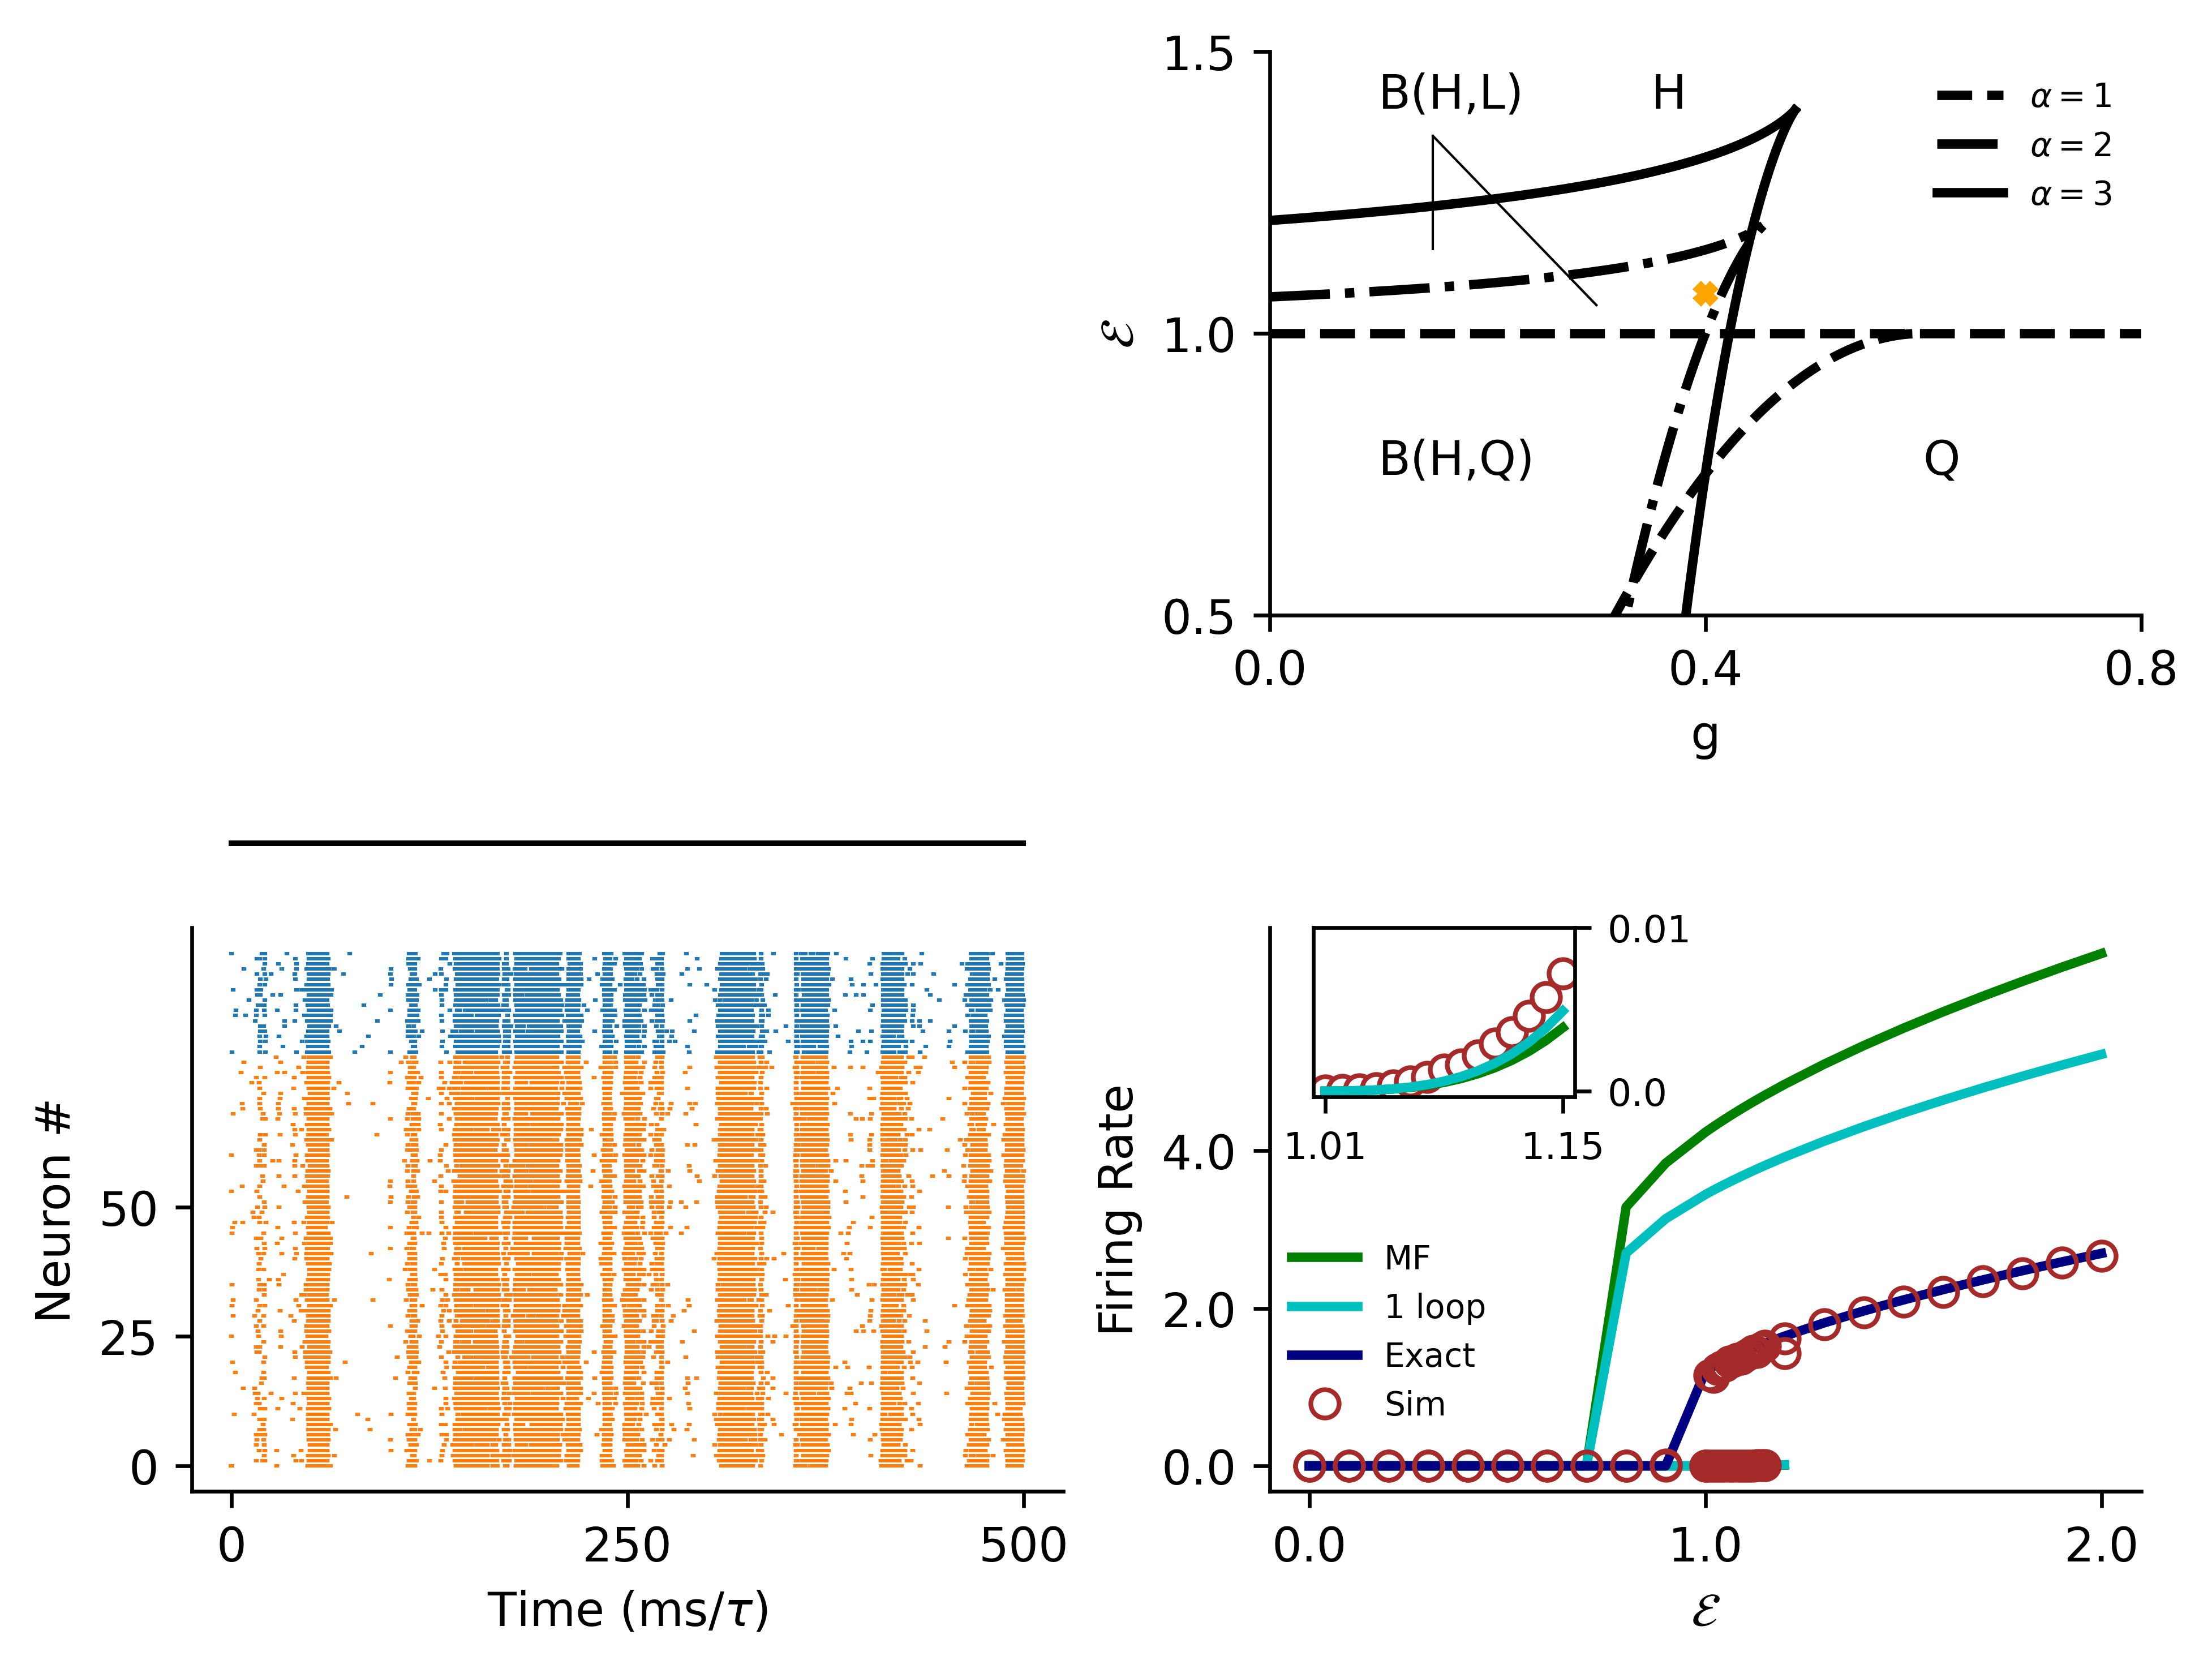

In [13]:
fontsize=10
g_limL = 0.0
g_limH = 0.8
E_limL = 0.5
E_limH = 1.5

f, ax = plt.subplots(2,2,dpi=600,layout='constrained')

ax[0, 0].axis('off')

ax[0, 1].plot(g_plot_a1, E, '--k', linewidth=2, label='$\\alpha=1$')
ax[0, 1].plot(g, E_plot_A2_Plus, '-.k', linewidth=2, label='$\\alpha=2$')
ax[0, 1].plot(g, E_plot_A2_Minus, '-.k', linewidth=2)
ax[0, 1].plot(g, E_plot_A3_1, '-k', linewidth=2, label='$\\alpha=3$')
ax[0, 1].plot(g, E_plot_A3_2, '-k', linewidth=2)
ax[0, 1].plot(g, E_plot_A3_3, '-k', linewidth=2)
ax[0, 1].plot(0.4, 1.07, 'X', color='orange', markersize=4.0)
ax[0, 1].hlines(1.0, g_limL, g_limH, 'k', linewidth=2, linestyle='dashed')
ax[0, 1].set_xlabel('g', fontsize=fontsize)
ax[0, 1].set_ylabel('$\\mathcal{E}$', fontsize=fontsize)
ax[0, 1].text(0.6, 0.75, 'Q', fontsize=fontsize)
ax[0, 1].text(0.1, 0.75, 'B(H,Q)', fontsize=fontsize)
ax[0, 1].text(0.35, 1.4, 'H', fontsize=fontsize)
ax[0, 1].text(0.1, 1.4, 'B(H,L)', fontsize=fontsize)
ax[0, 1].plot([0.15, 0.3], [1.35, 1.05], '-k', linewidth=0.5)
ax[0, 1].plot([0.15, 0.15], [1.35, 1.15], '-k', linewidth=0.5)
xticks = [0.0, 0.4, 0.8]
yticks = [0.5, 1.0, 1.5]
ax[0, 1].set_xticks(xticks, xticks, fontsize=fontsize)
ax[0, 1].set_yticks(yticks, yticks, fontsize=fontsize)
ax[0, 1].set_xlim(g_limL, g_limH)
ax[0, 1].set_ylim(E_limL, E_limH)
ax[0, 1].legend(frameon=False, loc='upper right',fontsize=7)
# ax[0, 1].set_aspect(1./ax[0,1].get_data_ratio())


idx = np.argwhere(spkTimes[:,1] < parameters.NE)
ax[1, 0].plot(spkTimes[:,0], spkTimes[:,1], '|', markersize=.8)
ax[1, 0].plot(spkTimes[idx,0], spkTimes[idx,1], '|', markersize=.8)
ax[1, 0].set_xlabel('Time (ms/{})'.format(r'$\tau$'), fontsize=fontsize)
ax[1, 0].set_ylabel('Neuron #', fontsize=fontsize)
# ax[1, 0].set_aspect(1./ax[1,0].get_data_ratio())
xticks = [0, 250, 500]
yticks = [0, 25, 50]
ax[1, 0].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 0].set_yticks(yticks, yticks, fontsize=fontsize)
inset_ax1 = ax[1, 0].inset_axes([0., 1.05, 1.0, 0.2])
inset_ax1.plot(t_plot, gSyn, 'k', linewidth=1.0)
inset_ax1.set_xticks([])
inset_ax1.set_yticks([]) 
inset_ax1.spines[['left', 'right', 'top', 'bottom']].set_visible(False)


idxE = np.where(np.abs((fr_MF_H - fr_MF_L) < 10e-8) & (fr_MF_H > 0.))[0][0]
idxL = np.where(np.abs(E_plot - 1.15) < 10e-4)[0][0] + 1
ax[1, 1].plot(E_plot, fr_MF_H, '-g', linewidth=2.0)
ax[1, 1].plot(E_plot[0:idxE-1], fr_MF_L[0:idxE-1], '-g', linewidth=2.0, label='MF')
ax[1, 1].plot(E_plot, fr_MF_Perturb_H, '-c', linewidth=2.0)
ax[1, 1].plot(E_plot[0:idxE-1], fr_MF_Perturb_L[0:idxE-1], '-c', linewidth=2.0, label='1 loop')
ax[1, 1].plot(E_plot, n_Renewal_H, '-', color='navy', linewidth=2.0, label='Exact')
ax[1, 1].plot(E_plot, fr_Sim_H, 'o', color='brown',markerfacecolor='None')
ax[1, 1].plot(E_plot[0:idxE-1], fr_Sim_L[0:idxE-1], 'o', color='brown',markerfacecolor='None', label='Sim')
ax[1, 1].set_xlabel('$\\mathcal{E}$', fontsize=fontsize)
ax[1, 1].set_ylabel('Firing Rate', fontsize=fontsize)
xticks = [0.0, 1.0, 2.0]
yticks = [0.0, 2.0, 4.0]
ax[1, 1].set_xticks(xticks, xticks, fontsize=fontsize)
ax[1, 1].set_yticks(yticks, yticks, fontsize=fontsize)
inset_ax3 = ax[1, 1].inset_axes([0.05, 0.7, 0.3, 0.3])
inset_ax3.plot(E_plot[11:idxL], fr_Sim_L[11:idxL], 'o', color='brown',markerfacecolor='white')
inset_ax3.plot(E_plot[11:idxL], fr_MF_L[11:idxL], '-g', linewidth=2.0, label='MF')
inset_ax3.plot(E_plot[11:idxL], fr_MF_Perturb_L[11:idxL], '-c', linewidth=2.0)
xticks = [1.01, 1.15]
yticks = [0.0, 0.01]
inset_ax3.set_xticks(xticks, xticks, fontsize=8)
inset_ax3.set_yticks(yticks, yticks, fontsize=8) 
inset_ax3.yaxis.tick_right()
ax[1, 1].legend(frameon=False, loc=[0.01, 0.1],fontsize=7)
# ax[1, 1].set_aspect(1./ax[1,1].get_data_ratio())

sns.despine(ax=ax[0, 1])
sns.despine(ax=ax[1, 0])
sns.despine(ax=ax[1, 1])

f.savefig('./Figures/Figure4.pdf', format='pdf')
plt.show()
